# Insper - Computação para Ciência dos Dados

## Mini-teste - Readmissões em Hospitais Medicare

Em outubro de 2012, o Centro de Serviços Medicare e Medicaid (CMS) do governo dos EUA começou a reduzir os pagamentos do Medicare para hospitais do Sistema de Pagamento Prospectivo de Pacientes Internados com readmissões em excesso. 

O excesso de readmissões é medido por uma razão, dividindo-se o número de readmissões “previstas” de 30 dias de um hospital para ataque cardíaco, insuficiência cardíaca e pneumonia, pelo número que seria “esperado”, com base em um hospital com características similares. Uma proporção maior que 1 indica readmissões em excesso.

* [Dicionário de Dados](https://data.cms.gov/provider-data/sites/default/files/data_dictionaries/hospital/HospitalCompare-DataDictionary.pdf)
* [Pandas Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### Questões

1. Crie uma coluna `True Admission Rate`, dividindo a coluna `Number of Readmissions` pela `Number of Discharges`
2. Plote um boxplot da diferença entre `True Admission Rate` e `Expected Readmission Rate`. Disserte.
3. Plote um scatterplot das colunas `Predicted Readmission Rate` e `Expected Readmission Rate`, com as cores dos pontos definidas pela coluna `Measure Name`. Disserte.
4. Plote um scatterplot de `Excess Readmission Ratio` por `Number of Discharges`. Disserte.
5. Encontre os 5 estados com maior `Excess Readmission Ratio` e os 5 estados com menor `Excess Readmission Ratio`. Filtre o dataframe com estes 10 estados. Plote um gráfico com um boxplot por estado, considerando a coluna `Excess Readmission Ratio`

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

df = pd.read_csv('https://raw.githubusercontent.com/amkaris/EDA/master/cms_hospital_readmissions.csv')

In [184]:
# ELIMINA OS DADOS NULOS
df = df[df['Number of Readmissions'].isna() == False]

In [185]:
# CONVERTE PARA INT A COLUNA NUMBER OF DISCHARGES
df['Number of Discharges'] = df['Number of Discharges'].astype(int)

# Questão 1)
Crie uma coluna `True Admission Rate`, dividindo a coluna `Number of Readmissions` pela `Number of Discharges`

In [186]:
df['True Admission Rate'] = round((df['Number of Readmissions'] / df['Number of Discharges']) * 100, 3)

# Questão 2)
Plote um boxplot da diferença entre `True Admission Rate` e `Expected Readmission Rate`. Disserte.

In [187]:
df['Difference'] = df['True Admission Rate'] - df['Expected Readmission Rate']

Text(0, 0.5, 'Difference')

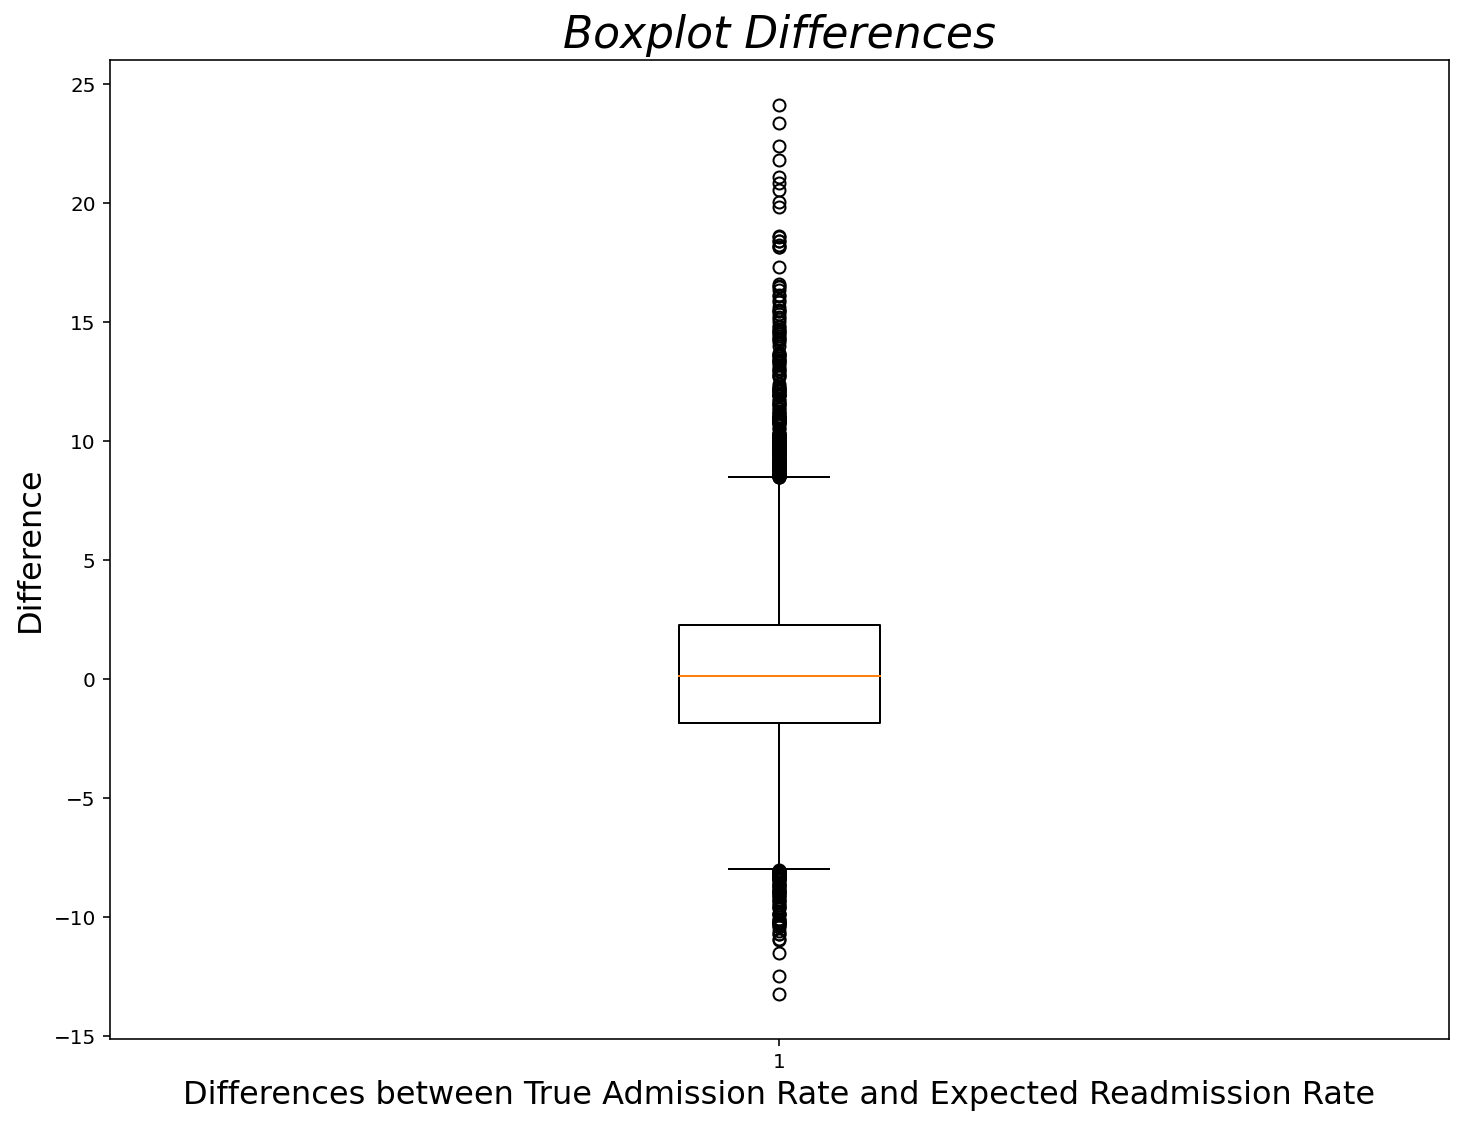

In [265]:
fig, ax = plt.subplots(figsize=(12,9));
ax.boxplot(df['Difference']);
ax.set_title('Boxplot Differences', fontsize=22, fontstyle='italic')
ax.set_xlabel('Differences between True Admission Rate and Expected Readmission Rate', fontsize=16)
ax.set_ylabel('Difference', fontsize=16)

`ANALISE:` Para "Difference" > 0, temos um valor de 'True Admission Rate' maior do que o esperado em 'Expected Readmission Rate'
Para "Difference" < 0, temos um valor de 'True Admission Rate' menor do que o esperado em 'Expected Readmission Rate'
Observamos que houve um equilibrio, uma vez que a média está em 0 e o boxplot é simétrico


# Questão 3)
Plote um scatterplot das colunas `Predicted Readmission Rate` e `Expected Readmission Rate`, com as cores dos pontos definidas pela coluna 

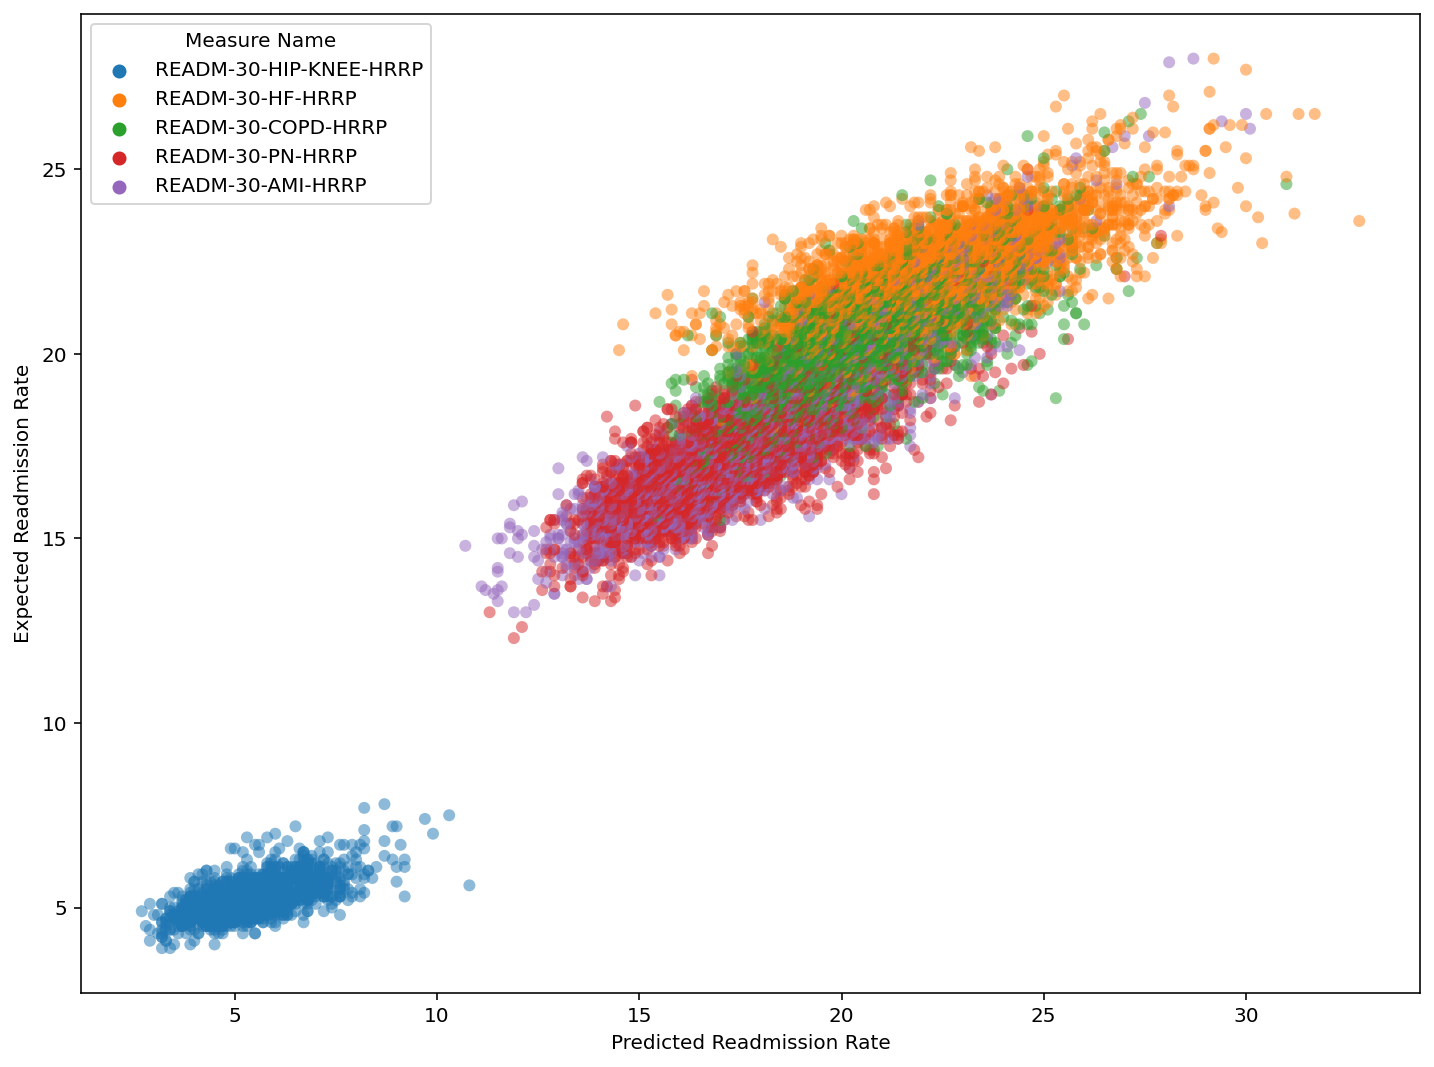

In [277]:
fig, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(data=df, x="Predicted Readmission Rate", y="Expected Readmission Rate", linewidth=0, hue="Measure Name", alpha=0.5);

# Questão 4)
Plote um scatterplot de `Excess Readmission Ratio` por `Number of Discharges`. Disserte.

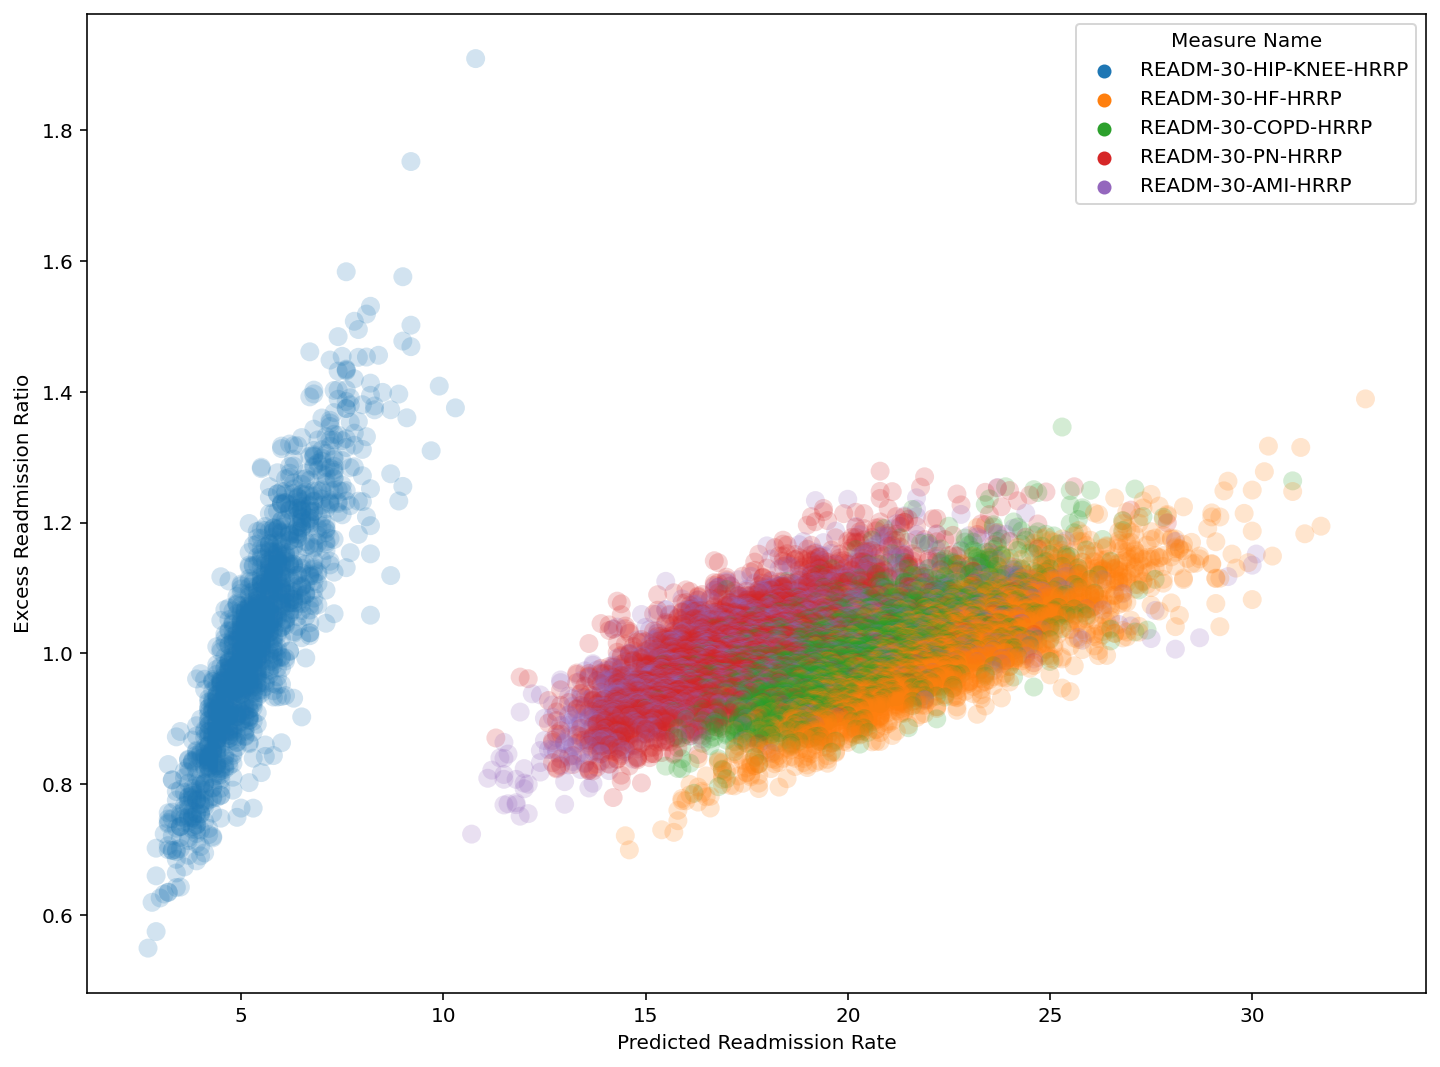

In [273]:
fig, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(data=df, x="Predicted Readmission Rate", y="Excess Readmission Ratio", alpha=0.2, linewidth=0, s=90, hue="Measure Name");

`ANALISE:` Podemos ver que para os casos em que houve grande excesso nas taxas de previsão em relação ao esperado (Excess Readmission Ratio) as taxas preditas também aumentaram.
Em suma:
Quanto maior o valor previsto, maior é o excesso

# Questão 5)
Encontre os 5 estados com maior `Excess Readmission Ratio` e os 5 estados com menor `Excess Readmission Ratio`. Filtre o dataframe com estes 10 estados. Plote um gráfico com um boxplot por estado, considerando a coluna `Excess Readmission Ratio`

In [262]:
# Sort values per Excess Readmission Ratio
df_sorted = df.sort_values(['Excess Readmission Ratio'])

# TOP 5 ERR
df_5_largest_err = df_sorted.tail(5)

# BOTTOM 5 ERR
df_5_smallest_err = df_sorted.head(5)

df_concatenado = pd.concat([df_5_largest_err, df_5_smallest_err], axis=0)

# TAKE THE STATES OF INTEREST
STATES_LIST = df_concatenado.State.unique()
df_listed_states = df[df['State'].isin(STATES_LIST)]

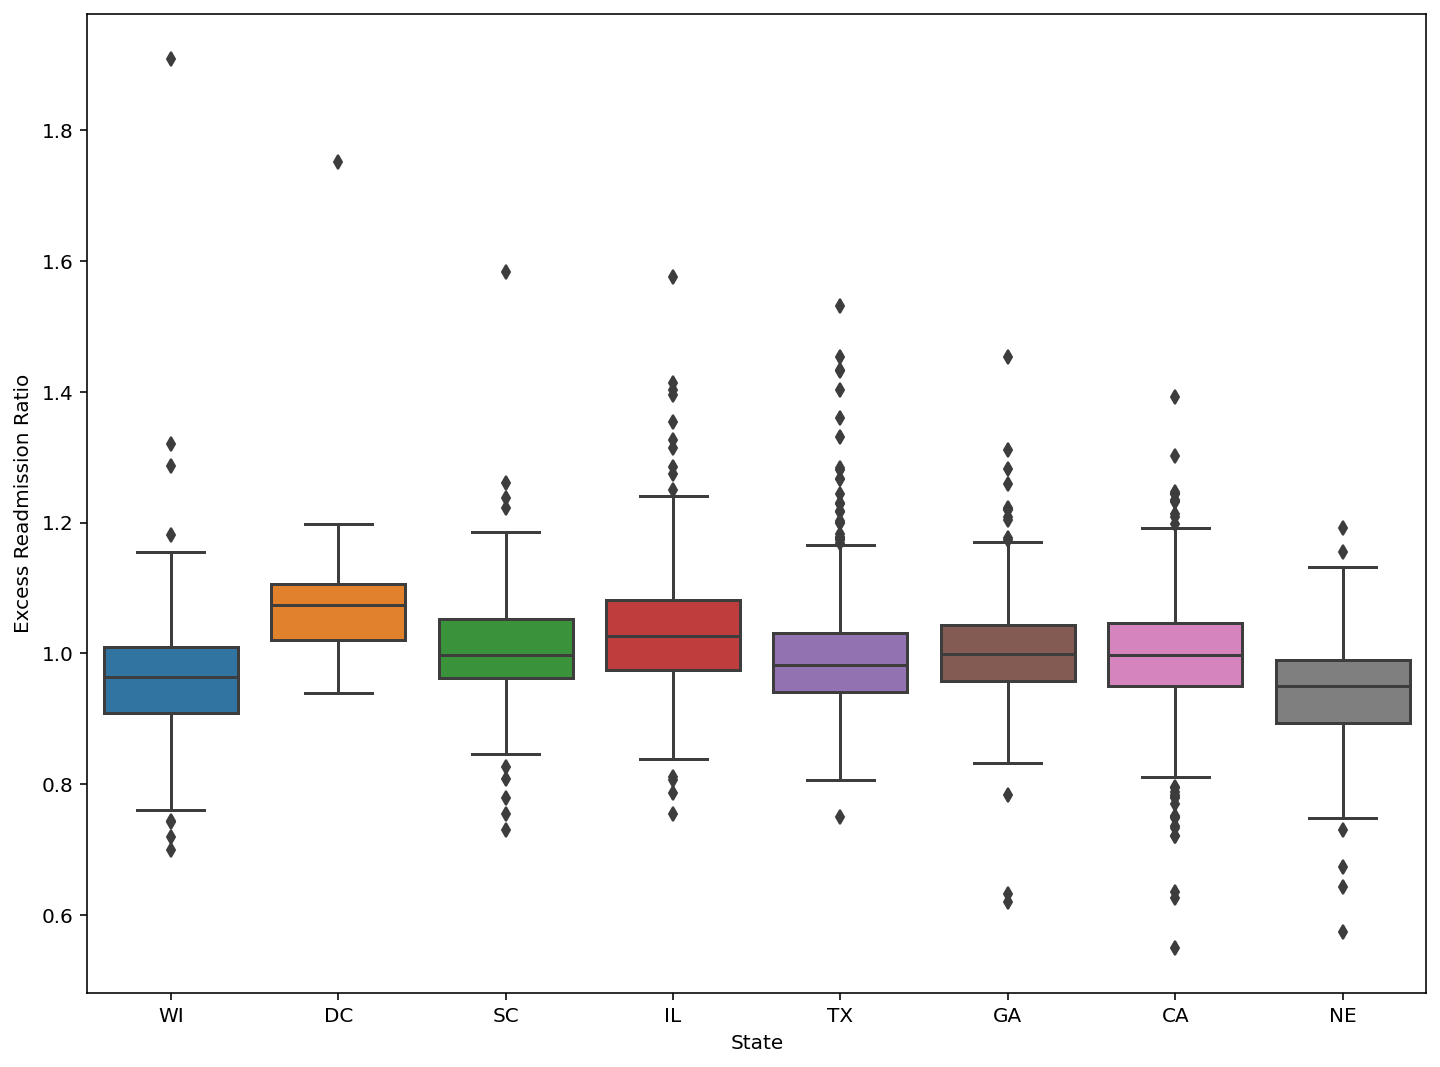

In [264]:
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.boxplot(y="Excess Readmission Ratio", x="State", data=df_listed_states)